<a href="https://colab.research.google.com/github/ChanukaUOJ/Algorithm_Needleman_Wunsch/blob/main/Research_Testing_(3)_32_to_512_layers_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


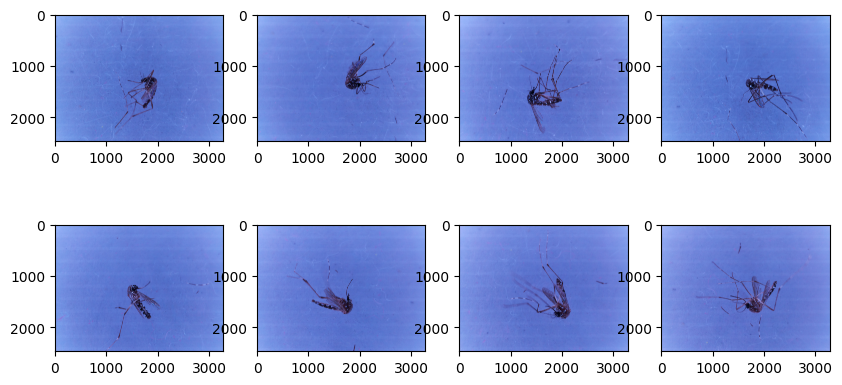

In [ ]:
import matplotlib.pyplot as plt
import os
src_path = "/content/drive/MyDrive/4th year/Research/Dataset/final_dataset/train"
sub_class = os.listdir(src_path)

fig = plt.figure(figsize=(10,5))
path = os.path.join(src_path,sub_class[0])
for i in range(4):
    plt.subplot(240 + 1 + i)
    img = plt.imread(os.path.join(path, f'albopictus10{str(i)}b.jpg'))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

path = os.path.join(src_path,sub_class[1])
for i in range(4,8):
    plt.subplot(240 + 1 + i)
    img = plt.imread(os.path.join(path, f'aegypti10{str(i)}c.jpg'))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
# def prepare_model():
#     model = Sequential()
#     model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(100, 100, 3)))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Flatten())
#     model.add(Dense(16, activation='relu'))
#     model.add(Dense(2, activation='sigmoid'))
#     model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])
#     return model

# def prepare_model():
#     model = Sequential()
#     model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(100, 100, 3)))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Flatten())
#     model.add(Dense(64, activation='relu'))
#     model.add(Dense(32, activation='relu'))
#     model.add(Dense(2, activation='softmax'))
#     model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
#     return model

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

def prepare_model():
    model = Sequential()

    # First convolutional block
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolutional block
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third convolutional block
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Fourth convolutional block
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Fifth convolutional block
    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flattening
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Added Dropout for regularization
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    # Output layer (2 classes)
    model.add(Dense(2, activation='softmax'))

    # Compile the model
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

    return model


In [ ]:
#first training
# train_datagen= ImageDataGenerator(validation_split=0.2,
#                                   rescale=1./255,
#                                   rotation_range=10,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2,
#                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    horizontal_flip=0.5)

#2nd training
train_datagen = ImageDataGenerator(validation_split=0.2,  # Slightly different validation split
                                   rescale=1./255,
                                   rotation_range=15,  # Increased rotation range
                                   width_shift_range=0.1,  # Reduced width shift
                                   height_shift_range=0.1,  # Reduced height shift
                                   shear_range=0.15,  # Slightly reduced shear range
                                   zoom_range=[0.8, 1.2],  # Adjusted zoom range
                                   horizontal_flip=True,  # Enabled flipping
                                   vertical_flip=True)  # Added vertical flip


test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/4th year/Research/Dataset/final_dataset/train',
                target_size=[100,100],
                batch_size=8,
                color_mode="rgb",
                interpolation='bicubic',
                class_mode='categorical',subset='training')

Found 819 images belonging to 2 classes.


In [ ]:
test_set= test_datagen.flow_from_directory('/content/drive/MyDrive/4th year/Research/Dataset/final_dataset/test',
              target_size=[100,100],
              color_mode = "rgb", interpolation='bicubic',shuffle=False,
              class_mode='categorical')

Found 180 images belonging to 2 classes.


In [ ]:
validation_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/4th year/Research/Dataset/final_dataset/train', # same directory as training data
    target_size=[100,100],color_mode = "rgb",interpolation='bicubic',
    batch_size=8, subset='validation')

Found 204 images belonging to 2 classes.


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the model
model = prepare_model()

# Define the callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',          # Monitor the validation loss
    patience=3,                  # Stop training after 3 epochs with no improvement
    restore_best_weights=True    # Restore the weights of the best epoch
)

model_checkpoint = ModelCheckpoint(
    filepath='model_epoch_{epoch:02d}_val_loss_{val_loss:.2f}.keras'        ,  # Save the model with epoch number and val_loss
    monitor='val_loss',            # Monitor the validation loss
    save_best_only=True,           # Save only the model with the best validation loss
    save_weights_only=False,       # Save the entire model (architecture + weights)
    verbose=1                      # Print a message when saving the model
)

# Train the model with the callbacks
history = model.fit(
    train_set,
    epochs=15,
    validation_data=validation_set,
    shuffle=True,
    callbacks=[early_stopping, model_checkpoint]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


102/103 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4965 - loss: 1.7112 
Epoch 1: val_loss improved from inf to 2.23631, saving model to model_epoch_01_val_loss_2.24.keras
103/103 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.4972 - loss: 1.7021 - val_accuracy: 0.5000 - val_loss: 2.2363
Epoch 2/15
102/103 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5879 - loss: 0.8353 
Epoch 2: val_loss did not improve from 2.23631
103/103 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.5879 - loss: 0.8346 - val_accuracy: 0.5000 - val_loss: 4.2708
Epoch 3/15
101/103 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.6011 - loss: 0.7329
Epoch 3: val_loss did not improve from 2.23631
103/103 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.6017 - loss: 0.7321 - val_accuracy: 0.5000 - val_loss: 5.1428
Epoch 4/15


In [ ]:
def plot_hist(hist):
    plt.figure(3)
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

    plt.figure(4)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [ ]:
plot_hist(history)

In [ ]:
results = model.evaluate(test_set,batch_size=8)

In [ ]:
predict_labels=model.predict(test_set,batch_size=8)
test_labels=test_set.classes
print(test_labels)
print(predict_labels.argmax(axis=1))


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print('\nClassification Report\n')
print(classification_report(test_labels, predict_labels.argmax(axis=1), target_names=['Apple', 'Banana']))
confusion = confusion_matrix(test_labels, predict_labels.argmax(axis=1))
print('Confusion Matrix\n')
print(confusion)